# Lab8 exercises 1
The main objective of this laboratory is to put into practice what you have learned on regression techniques. You will test several techniques on data with different shape and complexity. In particular, you will build models to approximate univariate analytical functions and multivariate synthetic datasets. Finally, you will adopt the aforementioned techniques to carry out a forecasting task.

#### Exericse 2.1.1 and 2.1.2
In this exercise you will build a regression model to approximate several analytical functions. Then, you will evaluate and discuss the quality of your models with the final goal to optimize their respective hyperparameters. The studied functions will be:

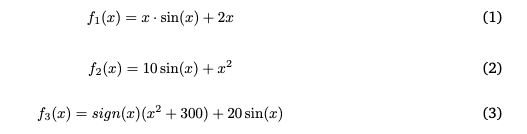

Use the following snippet of code to create you initial dataset. Note that f(x) should match one of
the functions mentioned before.

Draw and inspect the shape of the function. Which regression model of those you know could achieve better performance?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
import numpy as np
def f1(x):
    return x * np.sin(x) + 2*x

def f2(x):
    return 10 * np.sin(x) + x**2

def f3(x):
    return np.sign(x) * (300 + x**2) + 20 * np.sin(x)

In [3]:
def generate_X_y(f):
    tr = 20
    n_samples = 100
    X = np.linspace(-tr, tr, n_samples)
    y = f(X)
    return X, y

def plot_f(X, y, title):
    LW = 4
    fig, ax = plt.subplots()
    ax.plot(X, y, color='cornflowerblue', linewidth=.5*LW, label="ground truth")
    fig.suptitle(title)
    # ax.scatter(X, y, color='navy', s=30, marker='o', label="training points")

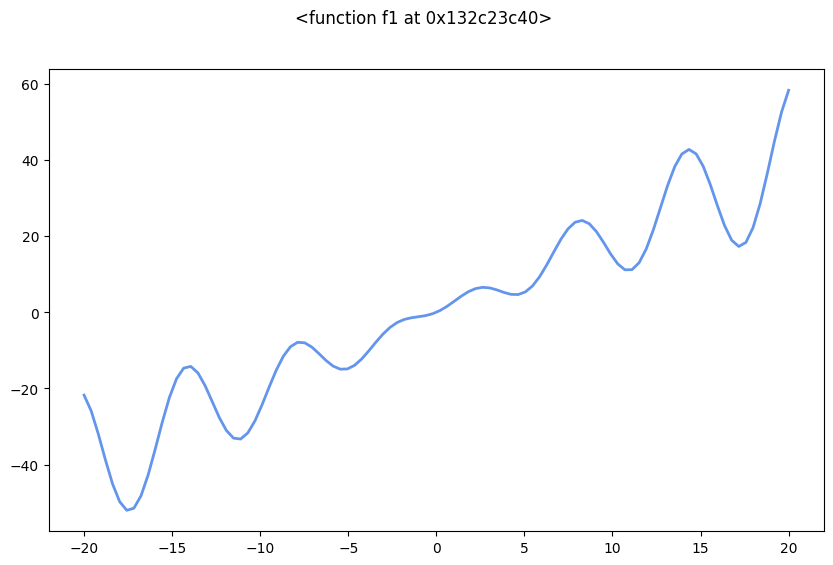

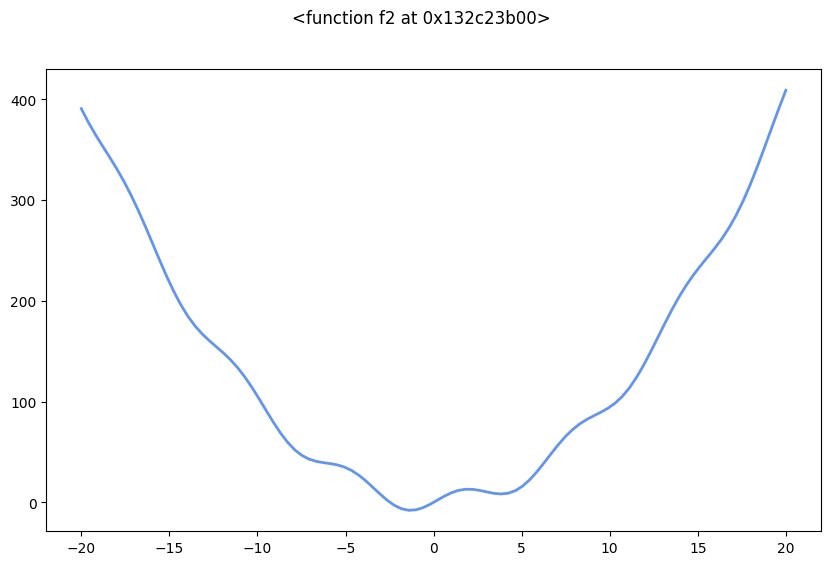

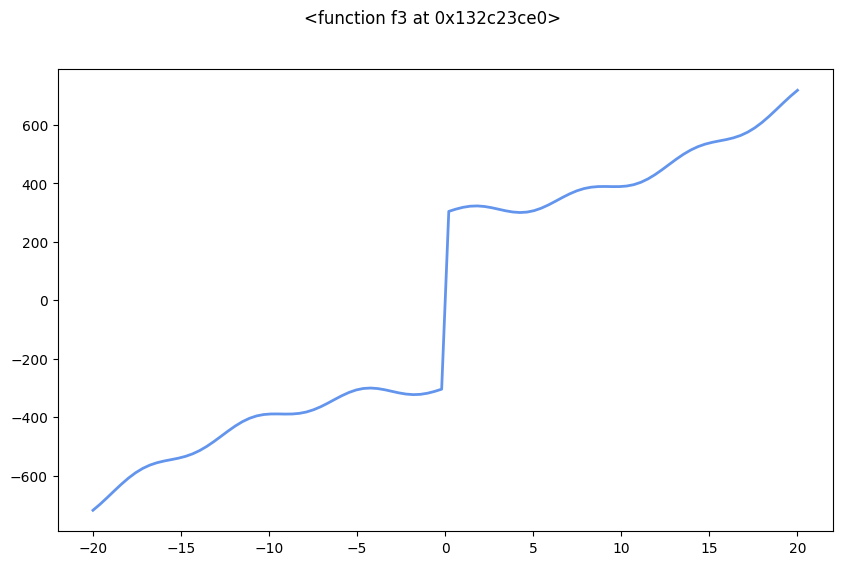

In [4]:
for f in [f1, f2, f3]:
    X, y = generate_X_y(f)
    plot_f(X, y, f)   

#### Exercise 2.1.3, 2.1.4 and 2.1.5
Frame now a regression task to your generated data. Start from the ordinary least squares Linear Regression. Then, choose additional models which you believe could outperform linear regression to approximate the function.

In [5]:
from sklearn.model_selection import train_test_split

def generate_train_test(f, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=30,
                                                    random_state=42,
                                                    shuffle=True)
    y_test = y_test[X_test.argsort()]
    X_test.sort()
    return X_train, X_test, y_train, y_test


In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def evaluate_model(f, X, y, model, model_name):
    X_train, X_test, y_train, y_test = generate_train_test(f, X, y)

    # plot the real function and the training points
    LW = 2
    fig, ax = plt.subplots()
    ax.plot(X, y, color='cornflowerblue', linewidth=.5*LW, label="ground truth")
    ax.scatter(X_train, y_train, color='navy', s=30, marker='o', label="training points")
    
    # predict the test points and plot them onto the chart
    model.fit(X_train.reshape(-1, 1), y_train)
    y_hat = model.predict(X_test.reshape(-1, 1))
    ax.plot(X_test, y_hat, linewidth=LW, label=model_name, color='r')
    
    fig.suptitle(f"{f} approximated by {model_name}")
    fig.legend()
    
    return mean_squared_error(y_test, y_hat), r2_score(y_test, y_hat)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [8]:
from prettytable import PrettyTable

degree = 5
models = [
    LinearRegression(),
    Ridge(random_state=42),
    MLPRegressor(hidden_layer_sizes=(10,), random_state=42, max_iter=500),
    MLPRegressor(hidden_layer_sizes=(10,10),  activation='tanh', solver='lbfgs',
                 alpha=0.000, batch_size='auto', learning_rate='constant',
                 learning_rate_init=0.01, power_t=0.5, max_iter=500, shuffle=True,
                 random_state=42, tol=0.0001, verbose=True, warm_start=False,
                 momentum=0.0, nesterovs_momentum=False, early_stopping=False,
                 validation_fraction=0.0, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
    SVR(gamma='scale'),
    RandomForestRegressor(n_estimators=300),
    make_pipeline(
        make_column_transformer(
            (FunctionTransformer(np.sin), [0]),
            (PolynomialFeatures(degree), [0])
        ),
        LinearRegression()
    ),
    make_pipeline(
        make_column_transformer(
            (FunctionTransformer(np.sin), [0]),
            (PolynomialFeatures(degree), [0])
        ),
        Ridge(alpha=1)
    )
]

names = [
    'linreg',
    'ridge',
    'mlp_standard',
    'mlp_tuned',
    'svr',
    'rf',
    f'sin+poly{degree}+linreg',
    f'sin+poly{degree}+ridge'
]

Evaluating linreg
Evaluating ridge
Evaluating mlp_standard
Evaluating mlp_tuned
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          141     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92009D+02    |proj g|=  1.88022D+01

At iterate    1    f=  2.42263D+02    |proj g|=  1.70091D+01

At iterate    2    f=  2.02177D+02    |proj g|=  1.47741D+01

At iterate    3    f=  1.23699D+02    |proj g|=  8.36059D+00

At iterate    4    f=  7.98100D+01    |proj g|=  3.40526D+01

At iterate    5    f=  7.93874D+01    |proj g|=  1.99819D+01

At iterate    6    f=  7.88053D+01    |proj g|=  1.73412D+01

At iterate    7    f=  7.54838D+01    |proj g|=  1.26356D+01

At iterate    8    f=  7.43701D+01    |proj g|=  2.40312D+01

At iterate    9    f=  7.25020D+01    |proj g|=  4.76166D+01

At iterate   10    f=  6.96576D+01    |proj g|=  1.11099D+02

At iterate   11    f=  6.62046D+01    |proj g|=  4.54156D+01

At itera

/Users/alex/Documents/istruzione/Polito1/ds_lab/python-exercies-and-lab/labs/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
 This problem is unconstrained.
/Users/alex/Documents/istruzione/Polito1/ds_lab/python-exercies-and-lab/labs/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Evaluating sin+poly5+linreg
Evaluating sin+poly5+ridge
+------------------+-------------------+---------------------+
|      model       |        MSE        |          R2         |
+------------------+-------------------+---------------------+
|      linreg      | 65.72227592689516 |  0.8950661957810065 |
|      ridge       | 65.74765554283465 |  0.8950256740612001 |
|   mlp_standard   | 142.0206387985538 |  0.7732463506997138 |
|    mlp_tuned     | 94.20898907573572 |  0.8495836080549203 |
|       svr        | 399.9552743551347 | 0.36142155968215894 |
|        rf        | 57.56298743539122 |  0.9080935167168507 |
| sin+poly5+linreg | 95.50251981842145 |  0.8475183250167124 |
| sin+poly5+ridge  | 93.41072390557368 |  0.8508581378836468 |
+------------------+-------------------+---------------------+


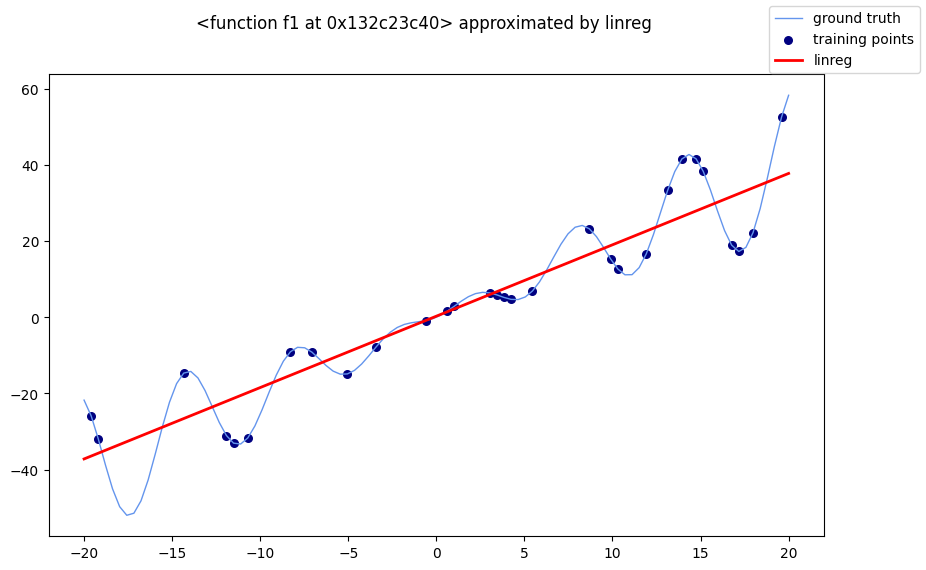

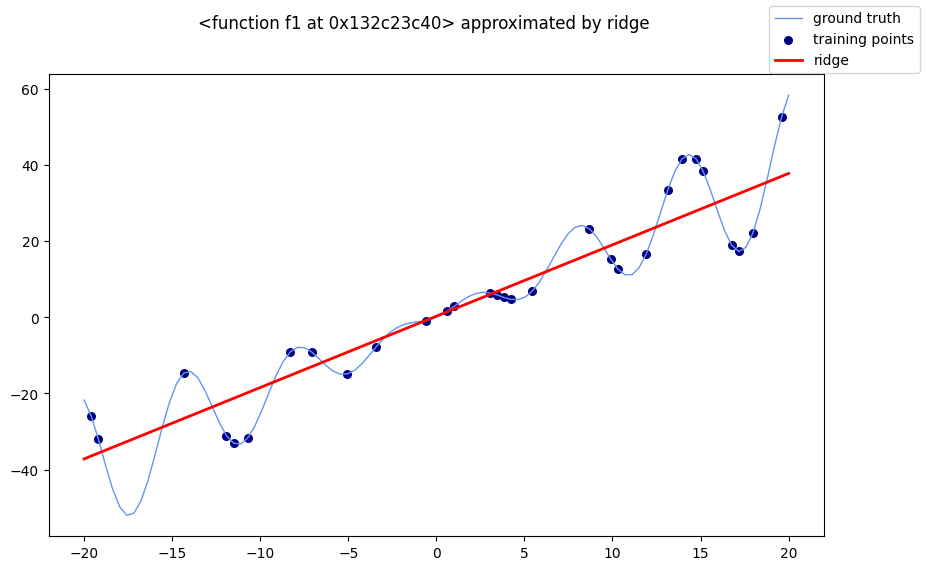

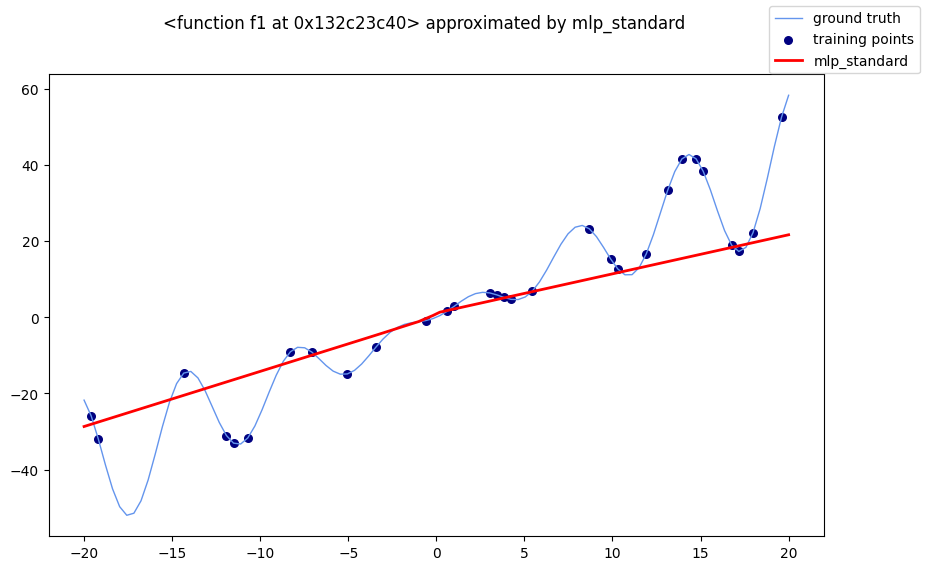

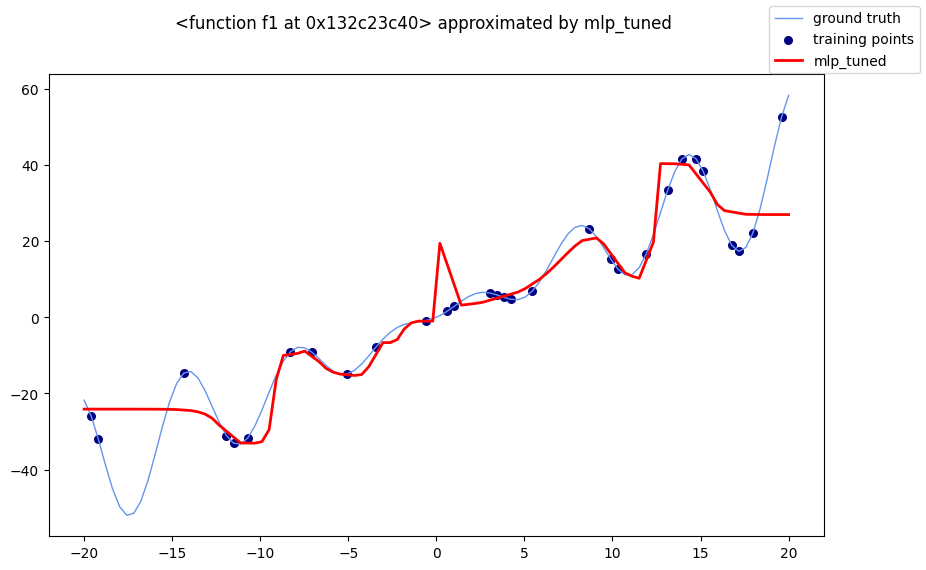

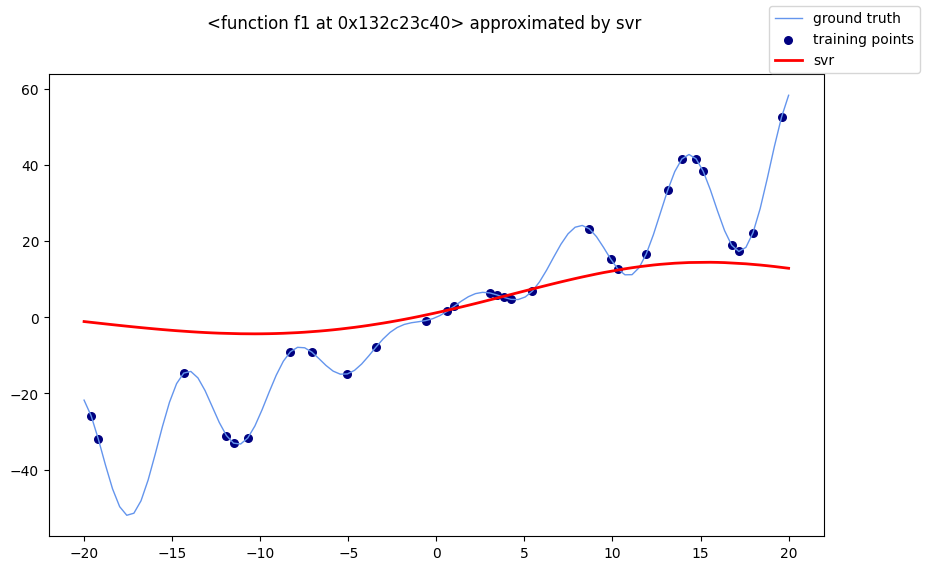

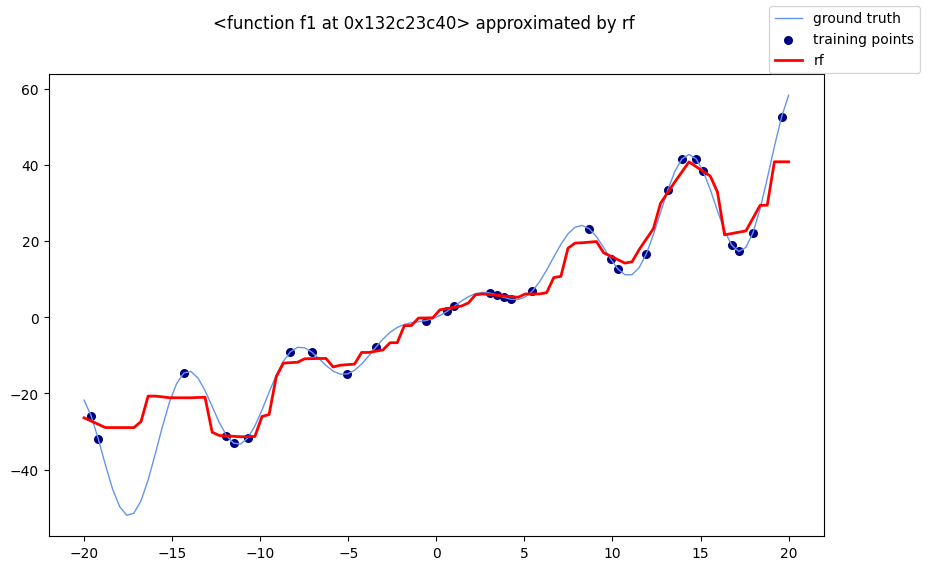

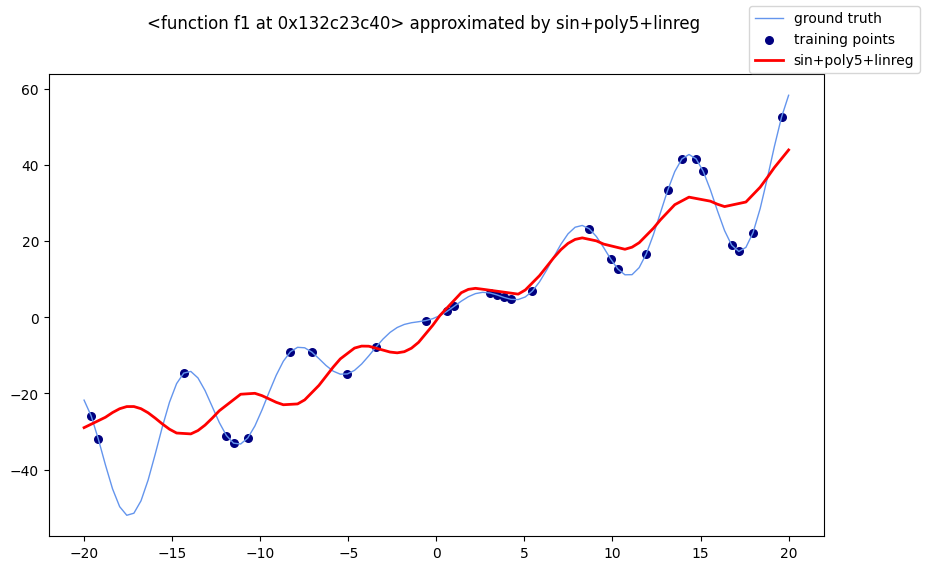

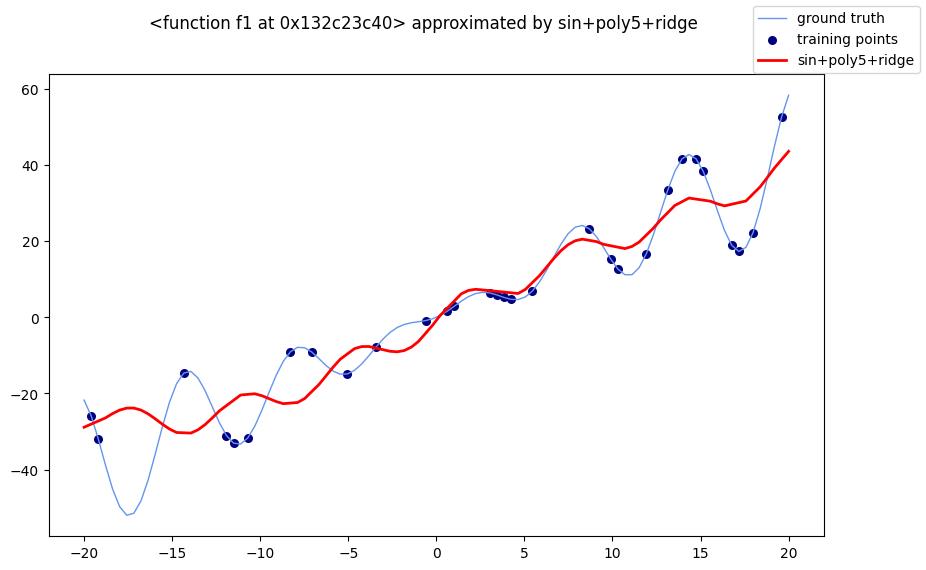

In [9]:
t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']
X, y = generate_X_y(f1)
for model, name in zip(models, names):
    print(f"Evaluating {name}")
    mse, r2 = evaluate_model(f1, X, y, model, name)
    t.add_row([name, mse, r2])

print(t)

#### Exercise 2.1.6
In many real tasks, we typically suppose that the measurements of the predictive variables carry some sort of noise. To reflect this aspect to our synthetic data, we can inject it manually.

In [10]:
def inject_noise(x):
    """Add a random noise drawn from a normal distribution."""
    return x + np.random.normal(0, 50, size=x.size)

/Users/alex/Documents/istruzione/Polito1/ds_lab/python-exercies-and-lab/labs/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          141     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15364D+03    |proj g|=  1.75250D+01

At iterate    1    f=  1.10276D+03    |proj g|=  1.62462D+01

At iterate    2    f=  1.05844D+03    |proj g|=  1.48046D+01

At iterate    3    f=  9.70250D+02    |proj g|=  7.31472D+00

At iterate    4    f=  9.35447D+02    |proj g|=  2.42808D+01

At iterate    5    f=  9.29440D+02    |proj g|=  3.85025D+01

At iterate    6    f=  9.09530D+02    |proj g|=  4.17411D+01

At iterate    7    f=  9.05508D+02    |proj g|=  1.92064D+01

At iterate    8    f=  9.04869D+02    |proj g|=  1.62844D+01

At iterate    9    f=  9.01131D+02    |proj g|=  3.89250D+01

At iterate   10    f=  8.98344D+02    |proj g|=  2.60056D+01

At iterate   11    f=  8.93755D+02    |proj g|=  2.49274D+01

At iterate   12    f=  8.92312D+02    |proj g|=  3.22643D+01

At iterate   13    f=  8.8

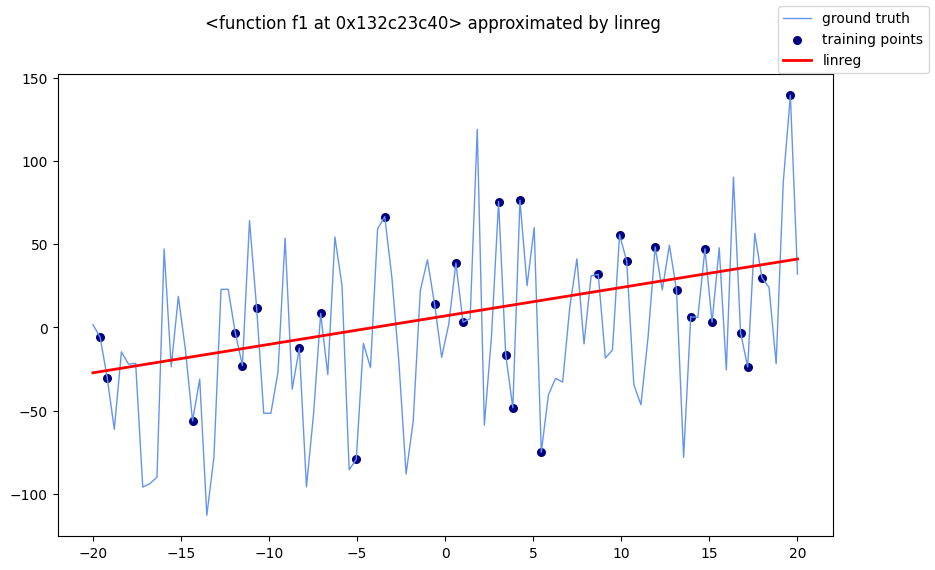

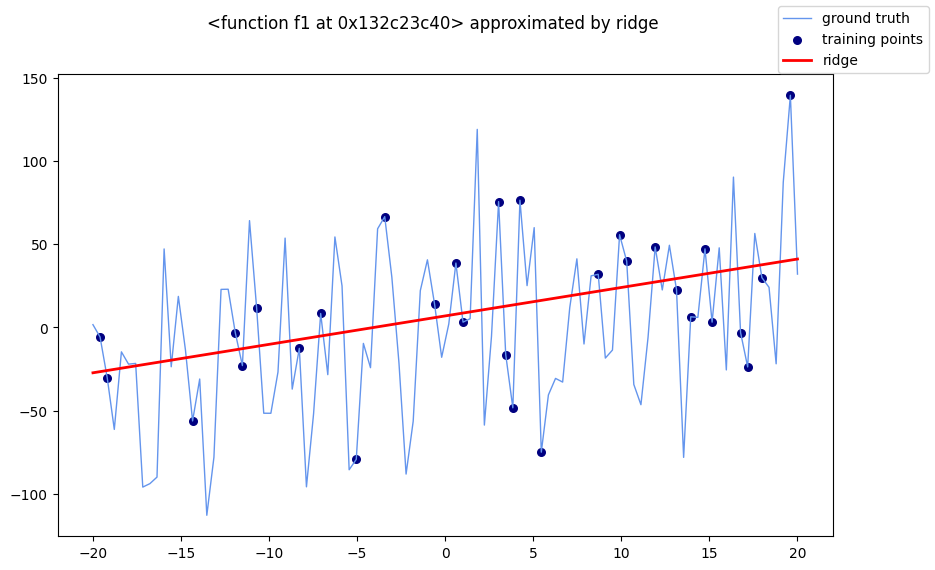

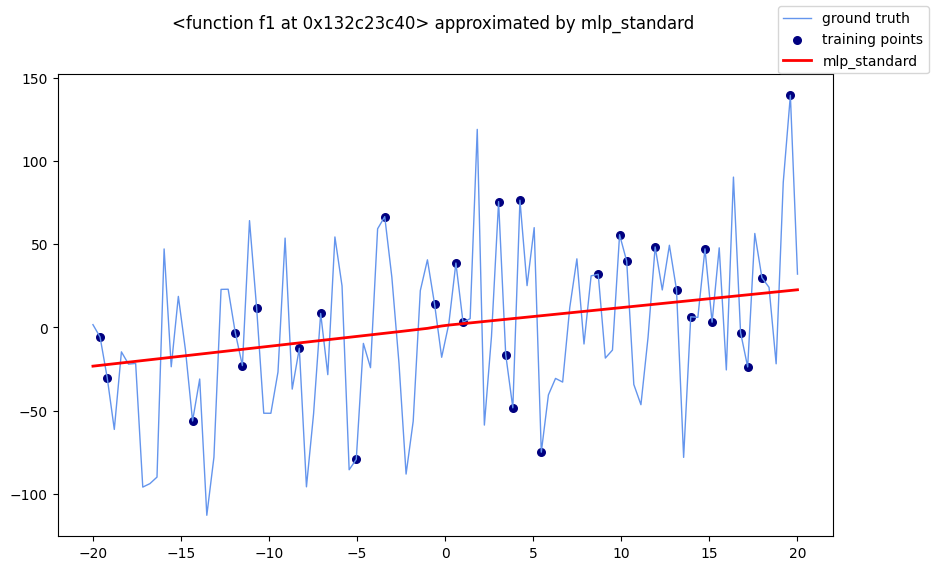

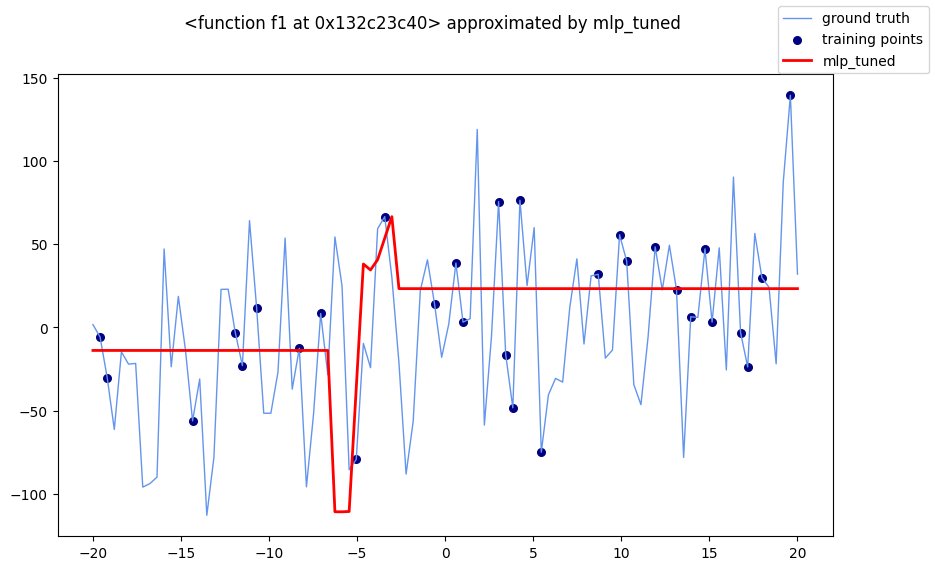

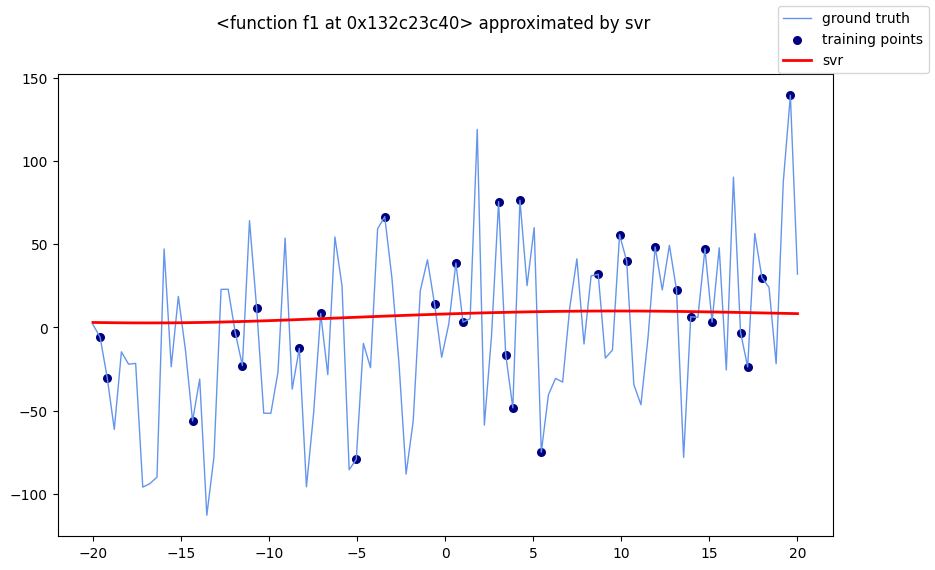

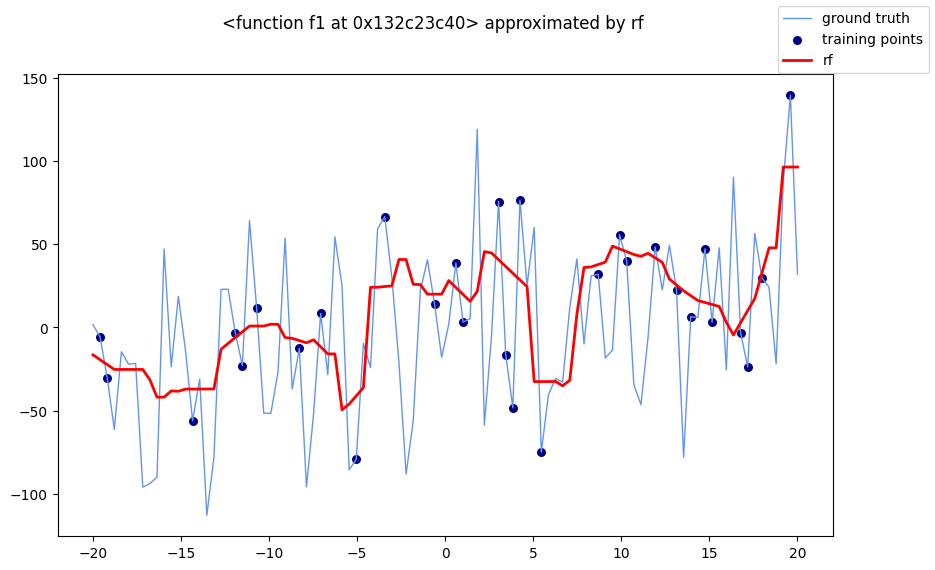

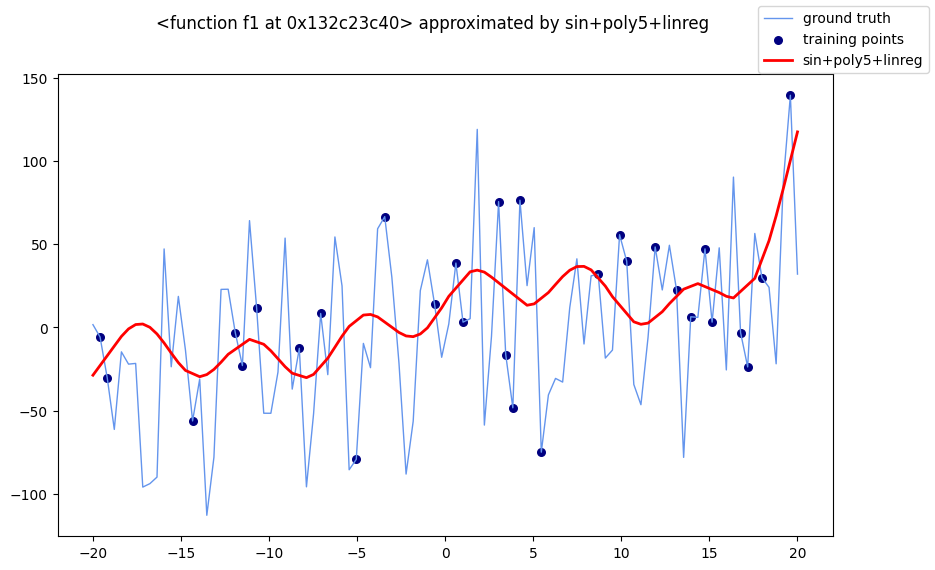

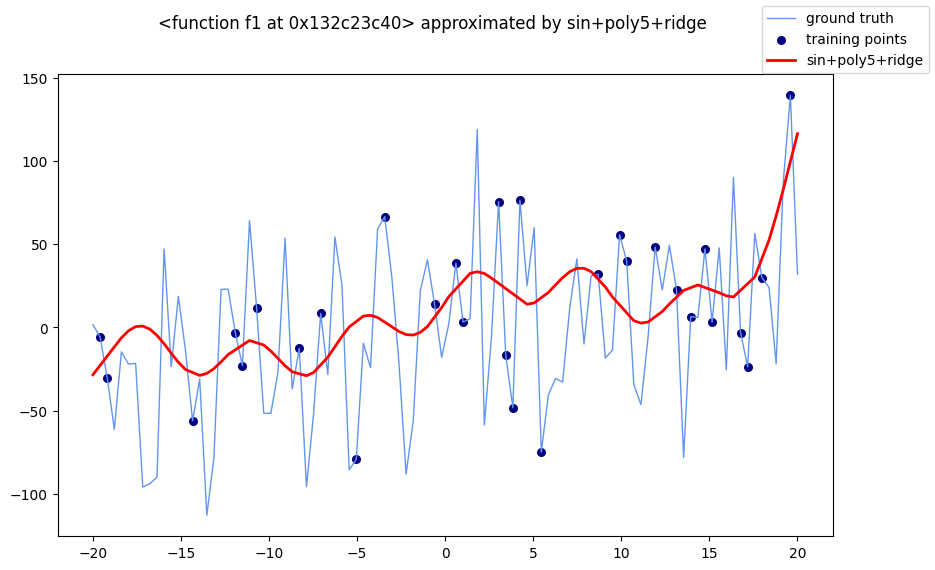

In [11]:
X, y = generate_X_y(f1)
y = inject_noise(y)

t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']
for model, name in zip(models, names):
    mse, r2 = evaluate_model(f1, X, y, model, name)
    t.add_row([name, mse, r2])

print(t)

#### Result for f2


/Users/alex/Documents/istruzione/Polito1/ds_lab/python-exercies-and-lab/labs/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
 This problem is unconstrained.
/Users/alex/Documents/istruzione/Polito1/ds_lab/python-exercies-and-lab/labs/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          141     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67544D+04    |proj g|=  1.35643D+02

At iterate    1    f=  1.65413D+04    |proj g|=  1.34086D+02

At iterate    2    f=  1.60674D+04    |proj g|=  1.30290D+02

At iterate    3    f=  9.79698D+03    |proj g|=  1.99086D+02

At iterate    4    f=  8.71984D+03    |proj g|=  2.07615D+02

At iterate    5    f=  7.69378D+03    |proj g|=  1.30929D+03

At iterate    6    f=  5.68532D+03    |proj g|=  2.04416D+03

At iterate    7    f=  5.57011D+03    |proj g|=  2.78927D+03

At iterate    8    f=  5.47045D+03    |proj g|=  4.43874D+03

At iterate    9    f=  5.02933D+03    |proj g|=  4.51203D+03

At iterate   10    f=  4.82698D+03    |proj g|=  4.72205D+03

At iterate   11    f=  4.70004D+03    |proj g|=  2.30403D+03

At iterate   12    f=  4.56903D+03    |proj g|=  5.95329D+03

At iterate   13    f=  4.5

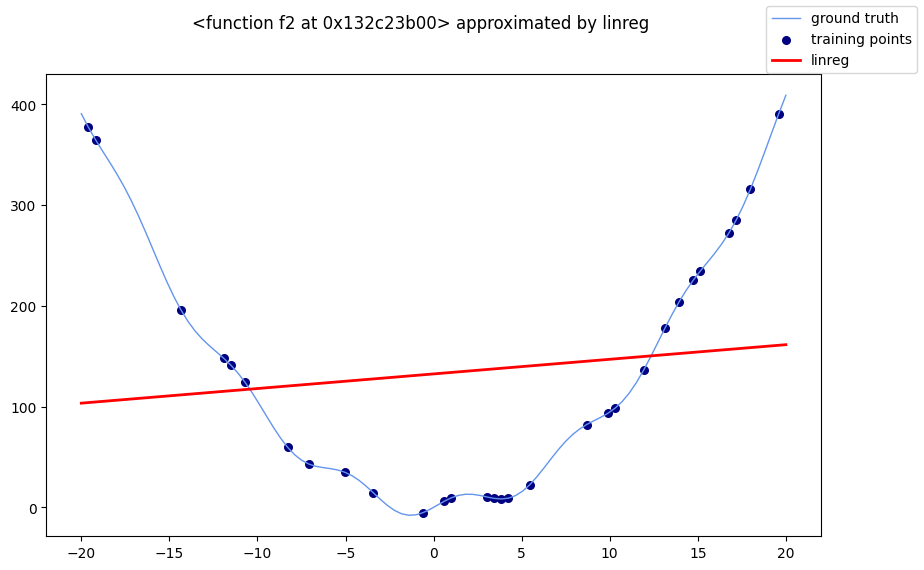

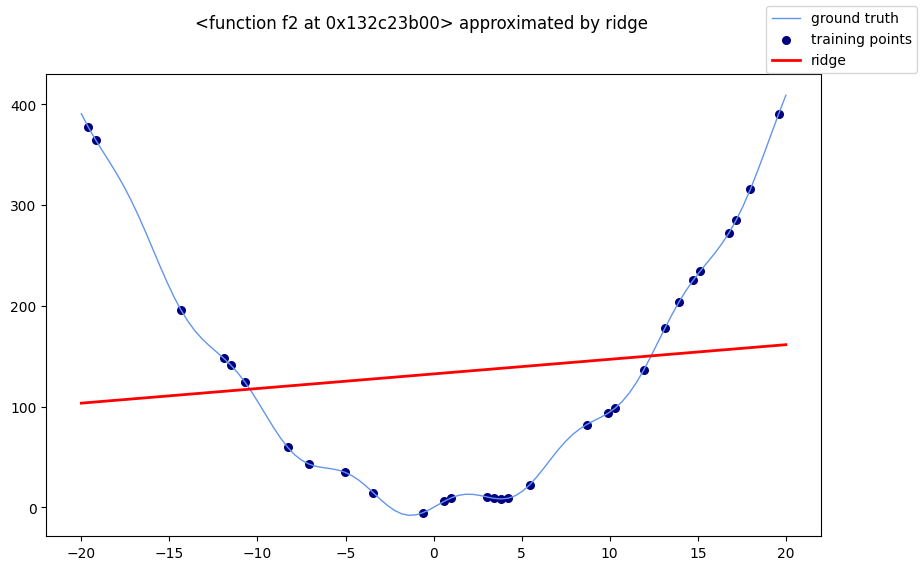

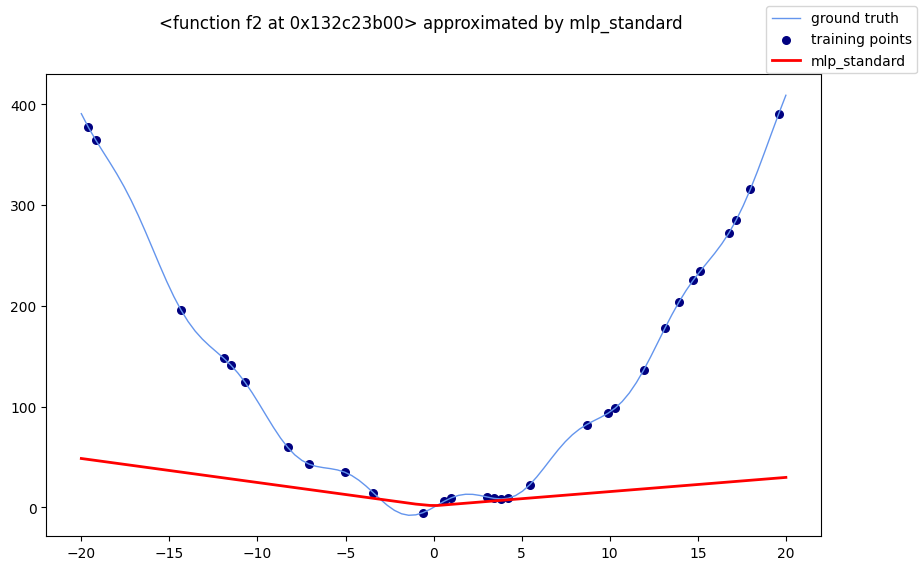

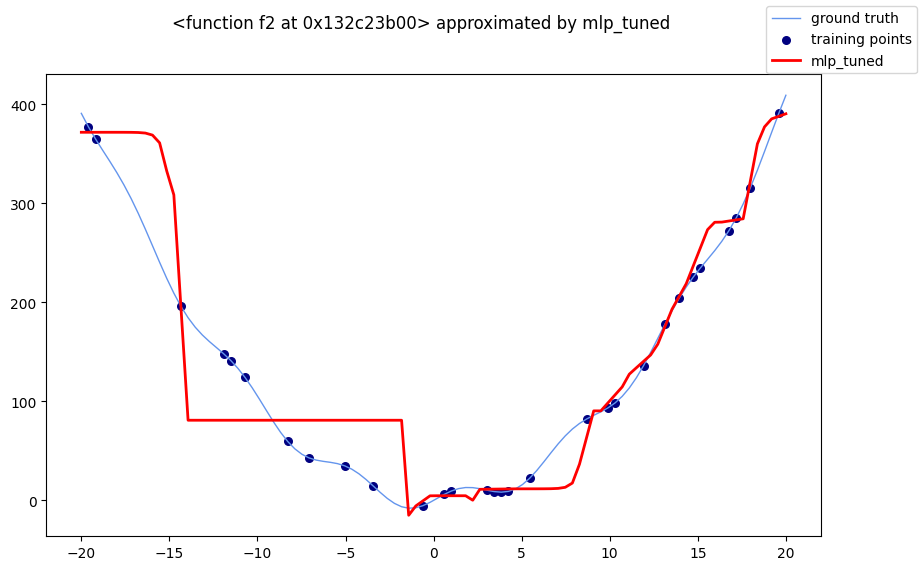

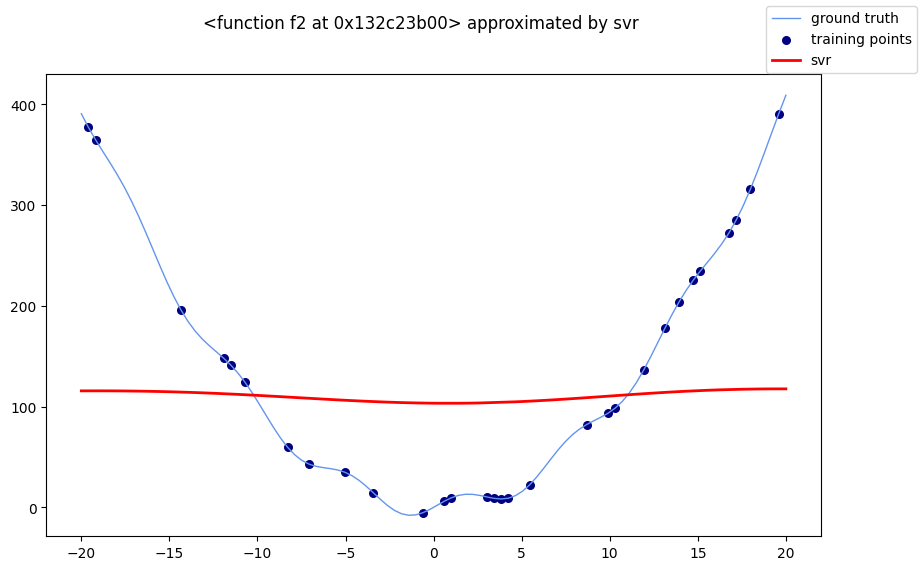

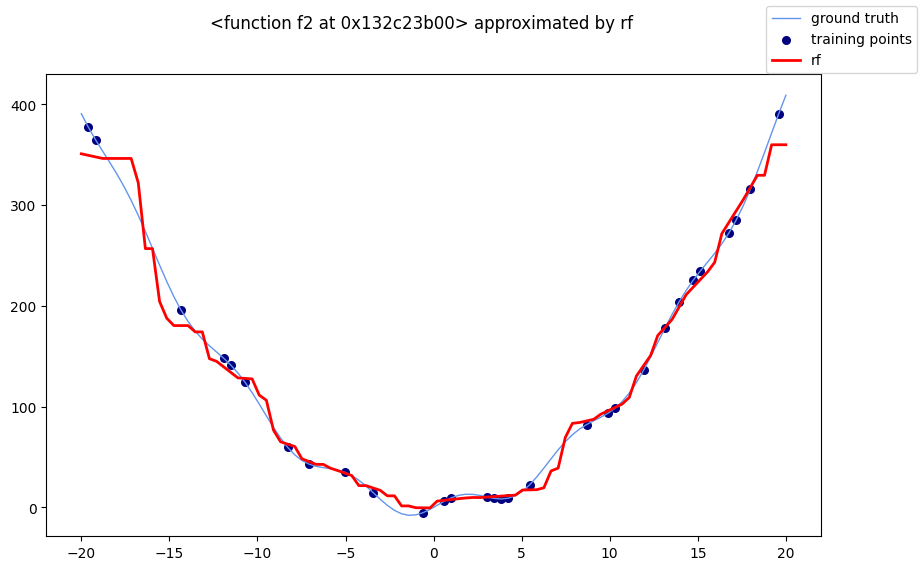

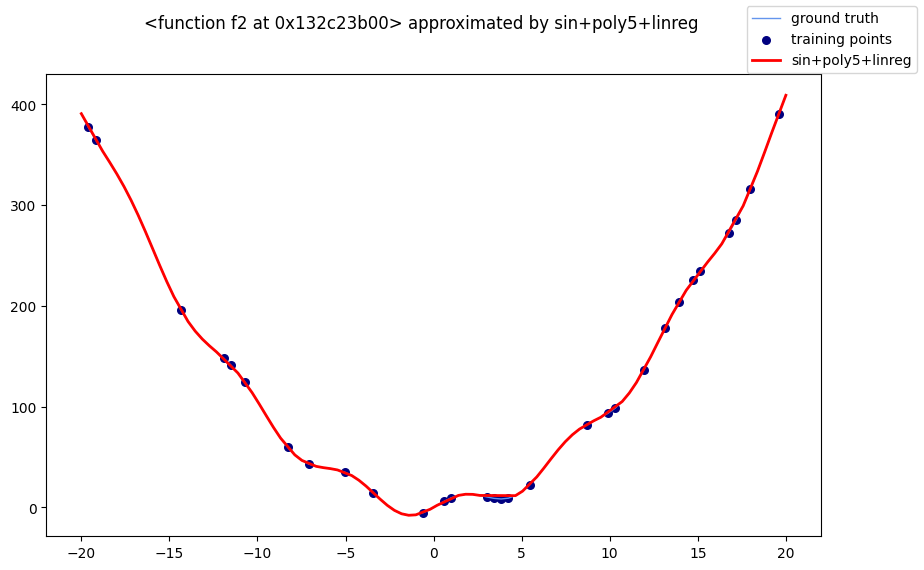

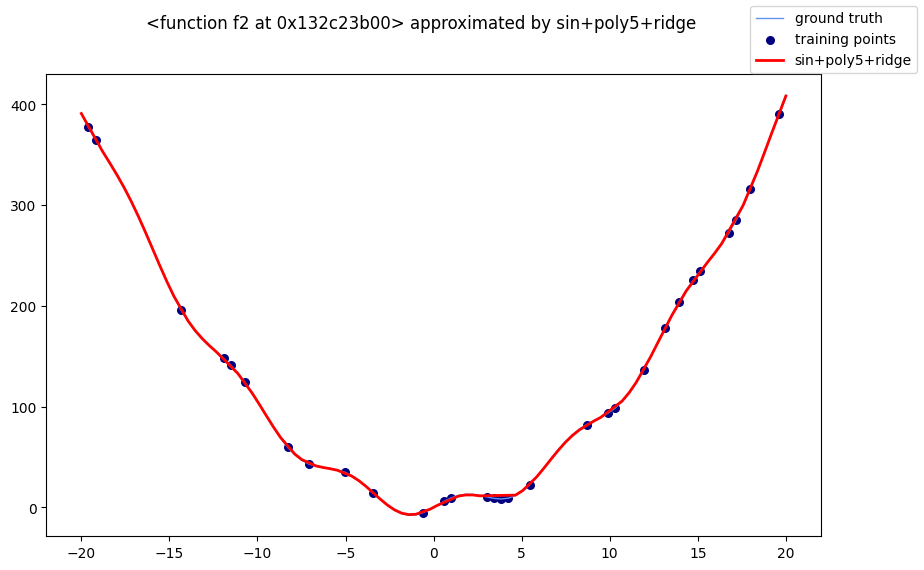

In [12]:
t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']
X, y = generate_X_y(f2)
for model, name in zip(models, names):
    mse, r2 = evaluate_model(f2, X, y, model, name)
    t.add_row([name, mse, r2])

print(t)

#### Result for f3

/Users/alex/Documents/istruzione/Polito1/ds_lab/python-exercies-and-lab/labs/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          141     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03376D+05    |proj g|=  3.98175D+02

At iterate    1    f=  1.02248D+05    |proj g|=  4.13522D+02

At iterate    2    f=  1.01096D+05    |proj g|=  4.18544D+02

At iterate    3    f=  8.44963D+04    |proj g|=  7.78191D+02

At iterate    4    f=  2.93752D+04    |proj g|=  7.73908D+02

At iterate    5    f=  1.79731D+04    |proj g|=  1.98229D+03

At iterate    6    f=  9.20066D+03    |proj g|=  1.29945D+02

At iterate    7    f=  8.34545D+03    |proj g|=  3.21294D+01

At iterate    8    f=  8.33195D+03    |proj g|=  3.27314D+01

At iterate    9    f=  8.13718D+03    |proj g|=  2.80327D+01

At iterate   10    f=  7.66985D+03    |proj g|=  4.37024D+00

At iterate   11    f=  7.66002D+03    |proj g|=  1.90436D+00

At iterate   12    f=  7.64643D+03    |proj g|=  2.65676D+00

At iterate   13    f=  7.6

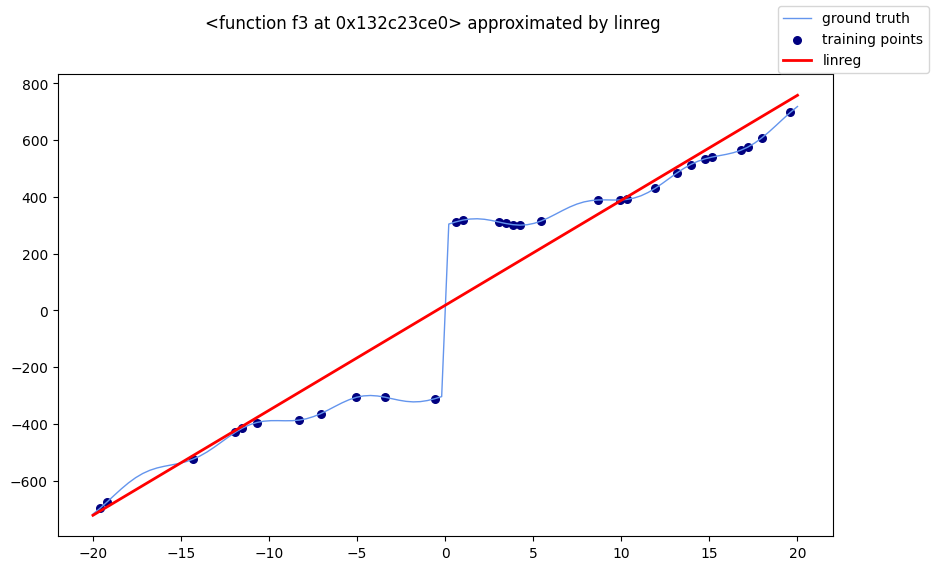

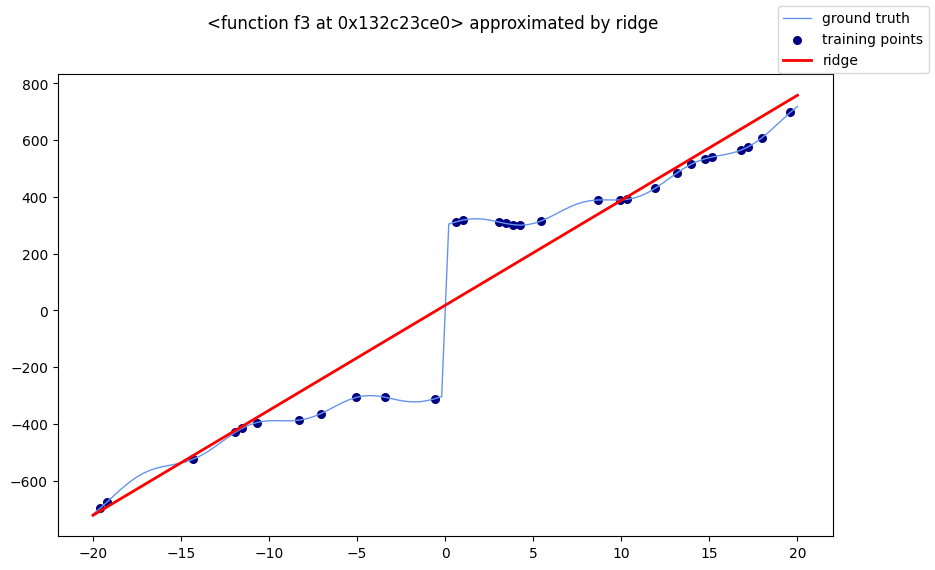

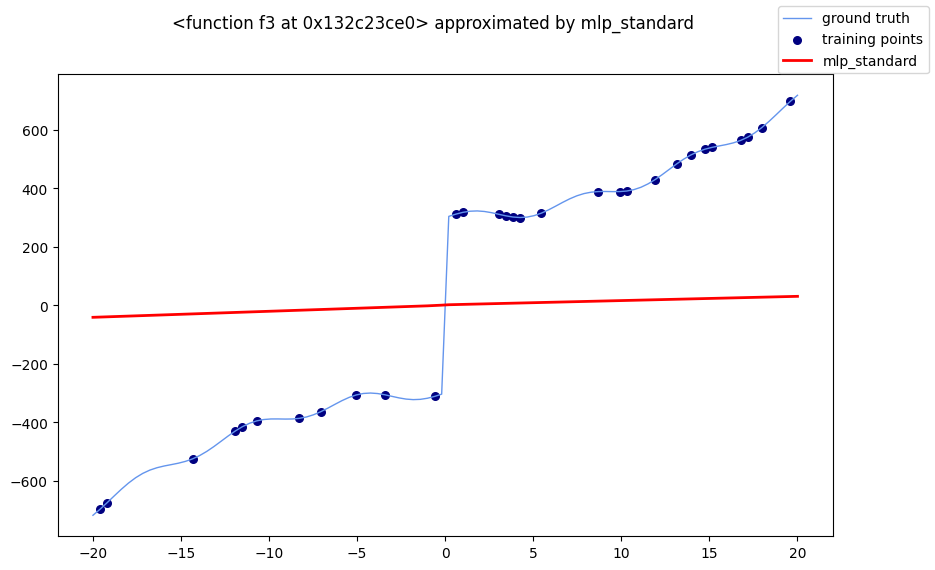

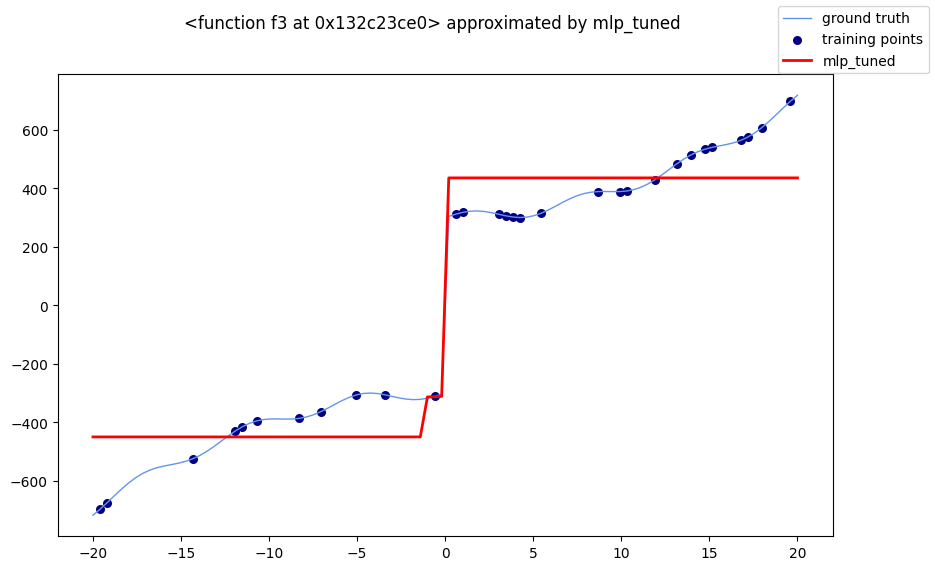

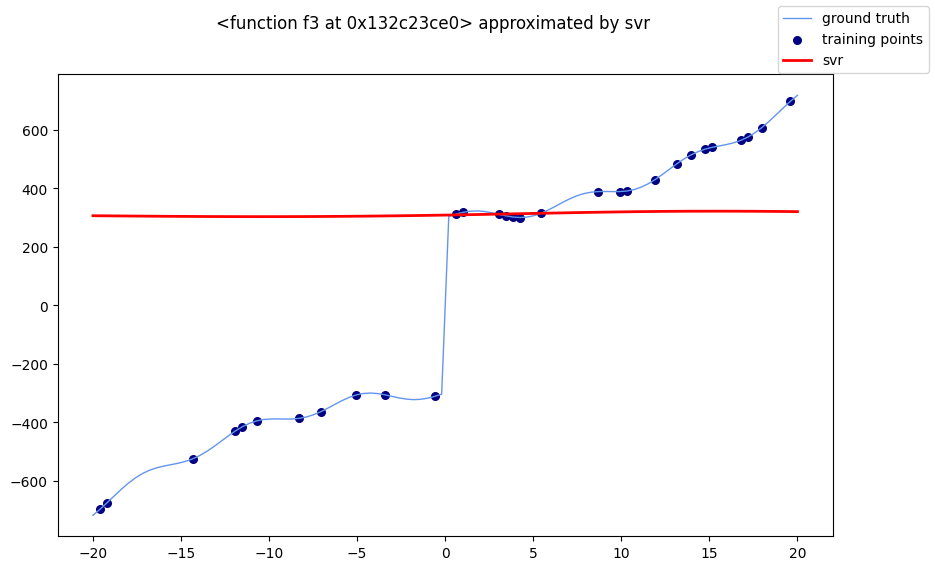

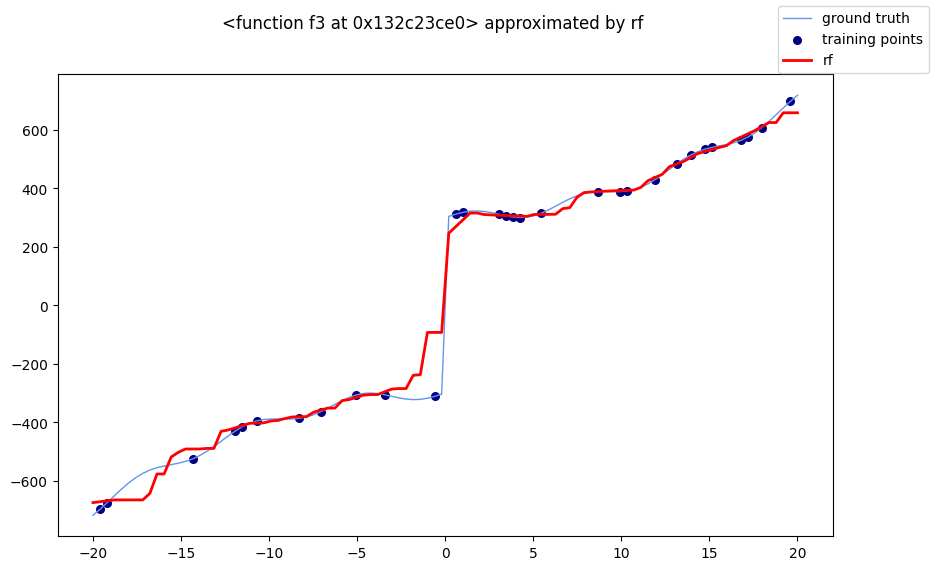

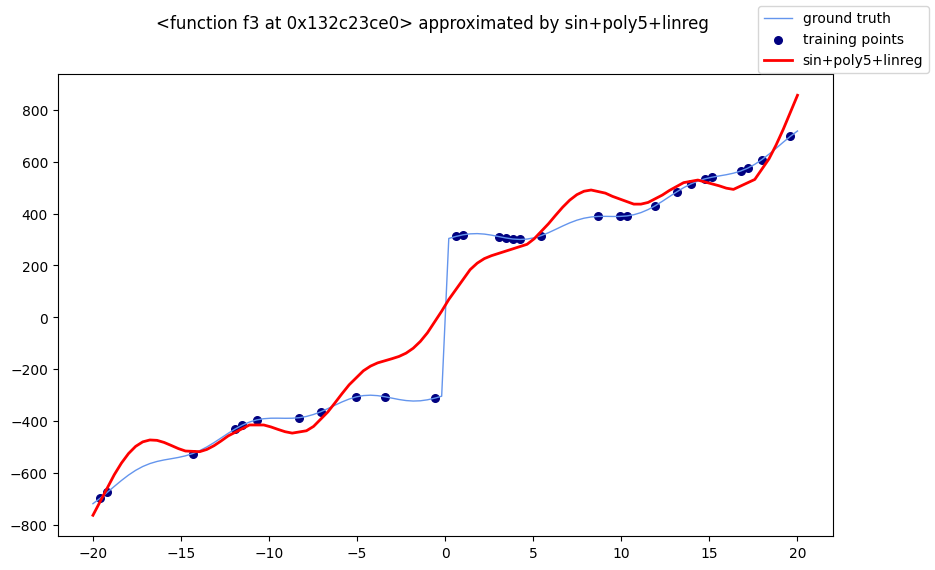

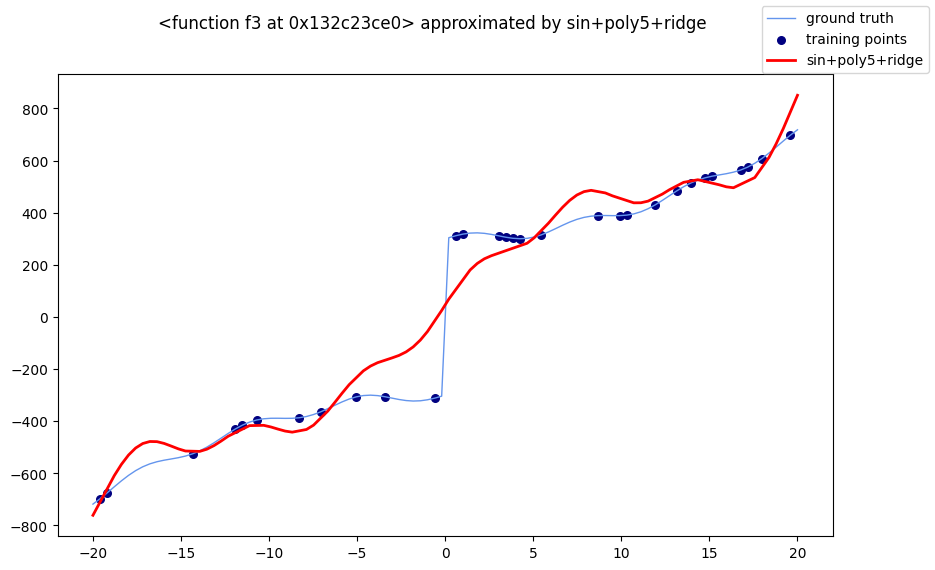

In [13]:
t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']
X, y = generate_X_y(f3)
for model, name in zip(models, names):
    mse, r2 = evaluate_model(f3, X, y, model, name)
    t.add_row([name, mse, r2])

print(t)

# Lab8 exercises 2
In this exercise, you will carry out a multivariate regression analysis. Technically speaking, the preprocessing step added in the pipeline in Exercise 1 also lead to a multivariate analyis, considering also the newly generated features. Now, we generate a synthetic, multi-dimensional dataset using scikit-learn. The nature and the importance of each of the features can be fine-tuned using the make_regression function.

#### Exericse 2.2.1
We can use the make_regression function to generate a synthetic dataset with 2000 points. You should spend enough time inspecting the function parameters. For now, we recall that, by default:

- 100 features are generated, 10 of which are informative
- the target variable has a single dimension
- no noise is applied. You can set a normal noise with the parameter noise

In [14]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=2000, random_state=42)
X.shape, y.shape


((2000, 100), (2000,))

#### Exercise 2.2.2
Test the regression pipeline that you developed in Exercise 2.1. Pay enough attention to the differences with the previous exercise:
- How does your model handle the presence of multiple features?
- Is there any correlation among features? How does this impact the model performance?

In [15]:
t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']

for model, name in zip(models, names):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=.7,
                                                    random_state=42,
                                                    shuffle=True)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    mse = mean_squared_error(y_test, y_hat)
    r2 = r2_score(y_test, y_hat)
    t.add_row([name, mse, r2])

print(t)

/Users/alex/Documents/istruzione/Polito1/ds_lab/python-exercies-and-lab/labs/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1131     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.92830D+04    |proj g|=  3.26969D+01

At iterate    1    f=  1.87583D+04    |proj g|=  1.31451D+02

At iterate    2    f=  1.73418D+04    |proj g|=  1.38402D+02

At iterate    3    f=  7.87425D+03    |proj g|=  5.44591D+01

At iterate    4    f=  7.20231D+03    |proj g|=  8.01652D+01

At iterate    5    f=  7.15253D+03    |proj g|=  9.30019D+01

At iterate    6    f=  6.89904D+03    |proj g|=  7.94890D+01

At iterate    7    f=  6.73506D+03    |proj g|=  2.11179D+02

At iterate    8    f=  6.67493D+03    |proj g|=  6.06494D+01

At iterate    9    f=  6.60779D+03    |proj g|=  1.30840D+02

At iterate   10    f=  6.59414D+03    |proj g|=  1.08173D+02

At iterate   11    f=  6.55123D+03    |proj g|=  4.59392D+01

At iterate   12    f=  6.50232D+03    |proj g|=  1.42772D+02

At iterate   13    f=  6.4

/Users/alex/Documents/istruzione/Polito1/ds_lab/python-exercies-and-lab/labs/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


+------------------+----------------------+-----------------------+
|      model       |         MSE          |           R2          |
+------------------+----------------------+-----------------------+
|      linreg      | 1.17328856128854e-25 |          1.0          |
|      ridge       | 0.026589221217734115 |   0.9999993361938854  |
|   mlp_standard   |  1802.7973804158555  |   0.9549927425585707  |
|    mlp_tuned     |  8957.216058029486   |   0.7763810101669638  |
|       svr        |  38892.56762703369   |  0.029037970232504096 |
|        rf        |  10647.973102227557  |   0.7341708658735551  |
| sin+poly5+linreg |  40959.66218569413   | -0.022567527960502876 |
| sin+poly5+ridge  |  40620.548993992896  | -0.014101487968165127 |
+------------------+----------------------+-----------------------+


#### Exercise 2.2.3
Using the function constructor, make the problem harder for your regression model. Try to regenerate the dataset adding some noise using the noise parameter and to increase or reduce the gap between n_features and n_informative features.
- How does the model behave in this case?
- Train a Linear Regressor and inspect the coefficients learned for the non-informative features. What do these values mean?

In [16]:
X, y = make_regression(n_samples=2000, random_state=42, noise=10)
t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']

for model, name in zip(models, names):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=.7,
                                                    random_state=42,
                                                    shuffle=True)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    mse = mean_squared_error(y_test, y_hat)
    r2 = r2_score(y_test, y_hat)
    t.add_row([name, mse, r2])

print(t)

/Users/alex/Documents/istruzione/Polito1/ds_lab/python-exercies-and-lab/labs/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1131     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.92980D+04    |proj g|=  3.70165D+01

At iterate    1    f=  1.91705D+04    |proj g|=  5.50355D+01

At iterate    2    f=  1.85378D+04    |proj g|=  1.44625D+02

At iterate    3    f=  1.71576D+04    |proj g|=  1.39182D+02

At iterate    4    f=  8.01077D+03    |proj g|=  8.65665D+01

At iterate    5    f=  6.46418D+03    |proj g|=  2.38304D+02

At iterate    6    f=  6.39816D+03    |proj g|=  1.03747D+02

At iterate    7    f=  6.35194D+03    |proj g|=  1.69768D+02

At iterate    8    f=  6.28206D+03    |proj g|=  1.45139D+02

At iterate    9    f=  6.27339D+03    |proj g|=  4.88329D+01

At iterate   10    f=  6.23028D+03    |proj g|=  7.83063D+01

At iterate   11    f=  6.18881D+03    |proj g|=  1.30741D+02

At iterate   12    f=  6.07921D+03    |proj g|=  1.59495D+02

At iterate   13    f=  5.9

/Users/alex/Documents/istruzione/Polito1/ds_lab/python-exercies-and-lab/labs/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


+------------------+--------------------+-----------------------+
|      model       |        MSE         |           R2          |
+------------------+--------------------+-----------------------+
|      linreg      | 111.11544871232819 |   0.9972285317141203  |
|      ridge       | 111.32455388067974 |   0.9972233161626446  |
|   mlp_standard   | 1668.6619426581358 |   0.958379831899843   |
|    mlp_tuned     | 7855.603230568242  |   0.8040636520639036  |
|       svr        | 39028.249662080816 |  0.026547996292686005 |
|        rf        | 9962.166921264346  |   0.751521233087898   |
| sin+poly5+linreg | 40425.61438644843  | -0.008305411242194749 |
| sin+poly5+ridge  | 40291.90586225675  | -0.004970421025772165 |
+------------------+--------------------+-----------------------+


As we might have expected, the introduction of a random gaussian noise with standard deviation of 10 decreases the performance of every model.
Let's introduce more informative features. However, keep in mind that those will be used to generate a target value with a linear combination: we can expect that models close to linear will be again the top performer.

In [17]:
X, y = make_regression(n_samples=2000, random_state=42, noise=10,
                       n_informative=70)
t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']

for model, name in zip(models, names):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=.7,
                                                    random_state=42,
                                                    shuffle=True)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    mse = mean_squared_error(y_test, y_hat)
    r2 = r2_score(y_test, y_hat)
    t.add_row([name, mse, r2])

print(t)

/Users/alex/Documents/istruzione/Polito1/ds_lab/python-exercies-and-lab/labs/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1131     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40618D+05    |proj g|=  4.22153D+01

At iterate    1    f=  1.40262D+05    |proj g|=  1.47517D+02

At iterate    2    f=  1.38576D+05    |proj g|=  3.89409D+02

At iterate    3    f=  7.31370D+04    |proj g|=  5.65689D+02

At iterate    4    f=  4.52976D+04    |proj g|=  7.10668D+02

At iterate    5    f=  4.50250D+04    |proj g|=  2.39528D+02

At iterate    6    f=  4.49042D+04    |proj g|=  2.52250D+02

At iterate    7    f=  4.48844D+04    |proj g|=  1.16927D+02

At iterate    8    f=  4.48715D+04    |proj g|=  5.55981D+01

At iterate    9    f=  4.47256D+04    |proj g|=  2.84710D+02

At iterate   10    f=  4.44464D+04    |proj g|=  2.27595D+02

At iterate   11    f=  4.24171D+04    |proj g|=  2.50741D+03

At iterate   12    f=  4.22367D+04    |proj g|=  3.21593D+03

At iterate   13    f=  4.2

/Users/alex/Documents/istruzione/Polito1/ds_lab/python-exercies-and-lab/labs/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


+------------------+--------------------+----------------------+
|      model       |        MSE         |          R2          |
+------------------+--------------------+----------------------+
|      linreg      | 99.92193369275141  |  0.9996581789295267  |
|      ridge       |  100.175261776476  |  0.9996573123242324  |
|   mlp_standard   | 13983.378846989839 |  0.9521645213451454  |
|    mlp_tuned     | 78492.83451594715  |  0.7314853333280822  |
|       svr        | 288970.03486527514 | 0.011467822909904779 |
|        rf        | 191418.5227987043  |  0.3451799624629116  |
| sin+poly5+linreg | 287344.53105641884 | 0.017028478428343208 |
| sin+poly5+ridge  | 287575.8006801805  | 0.016237332506315427 |
+------------------+--------------------+----------------------+


Comparing the latter tables with the previous one (with 10 informative features) we can notice two different changes. While Linear Regression, Ridge and the standard MLP have improved their performance (in terms of both MSE and R2), the other, more complex classifiers performed significanlty worse. We can conclude that increasing the number of informative features not only brings more information (and lowers the redundancy), but also makes the problem harder, and the latter factor has the strongest impact on the tested models.